In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [7]:
data_covid=pd.read_excel('Combined_Covid_Lat_Long_v1.xlsx')

In [8]:
data_covid.head()

,Patient_Number,Age_Bracket,Gender,Detected_City,Detected_District,Detected_State,Contracted_from_which_Patient_,Nationality,Type_of_transmission,Status_Change_Date,...,city,latitude,longitude,country,iso2,state,capital,population,population_proper,Weather_Cond
0,244,2,M,Kochi,Kasaragod,Kerala,P117,India,Local,2020-03-20,...,Kochi,9.947743,76.253802,India,IN,Kerala,NaN,1519000,604696,Humid
1,294,67,M,Surat,Surat,Gujrat,NaN,India,Local,2020-03-22,...,Surat,21.195944,72.830232,India,IN,Gujrat,NaN,3842000,2894504,Warm
2,260,37,M,Bhilwara,Bhilwara,Rajasthan,NaN,India,Local,2020-03-21,...,BhilwAra,25.347071,74.640812,India,IN,Rajasthan,NaN,389911,326431,Warm
3,309,36,F,Amritsar,Shahid Bhagat Singh Nagar,Punjab,P182,India,Local,2020-03-21,...,Amritsar,31.622337,74.875335,India,IN,Punjab,NaN,1212000,1092450,Cold
4,196,65,M,Visakapatnam,Visakhapatnam,Andhra Pradesh,NaN,India,Imported,2020-03-29,...,Visakapatnam,17.704052,83.297663,India,IN,Andhra Pradesh,NaN,1529000,1063178,Warm


## Exploratory Data Analysis

In [52]:
# size of Dataset
data_covid.shape

(311, 21)

In [114]:
# Check Metadata
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 21 columns):
Patient_Number                    311 non-null int64
Age_Bracket                       311 non-null int64
Gender                            311 non-null object
Detected_City                     311 non-null object
Detected_District                 311 non-null object
Detected_State                    311 non-null object
Contracted_from_which_Patient_    112 non-null object
Nationality                       297 non-null object
Type_of_transmission              311 non-null object
Status_Change_Date                311 non-null datetime64[ns]
Test                              311 non-null int64
city                              311 non-null object
latitude                          311 non-null float64
longitude                         311 non-null float64
country                           311 non-null object
iso2                              311 non-null object
state                   

In [54]:
# Get count of Numeric columns in data
num_cols =data_covid.select_dtypes(exclude='object').columns
print(len(num_cols))
print(num_cols)

8
Index(['Patient_Number', 'Age_Bracket', 'Status_Change_Date', 'Test',
       'latitude', 'longitude', 'population', 'population_proper'],
      dtype='object')


In [55]:
# Basic Stats
data_covid.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_Number,311.0,1.560000e+02,8.992219e+01,1.000000,78.500000,1.560000e+02,2.335000e+02,3.110000e+02
Age_Bracket,311.0,4.496141e+01,1.748728e+01,2.000000,31.000000,4.500000e+01,5.850000e+01,9.600000e+01
Test,311.0,4.630225e-01,4.994344e-01,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000e+00
latitude,311.0,2.156733e+01,7.154787e+00,8.485498,17.384052,1.988094e+01,2.846010e+01,3.273569e+01
longitude,311.0,7.624014e+01,2.600972e+00,70.793217,74.640812,7.625380e+01,7.743915e+01,8.836304e+01
population,311.0,5.467719e+06,6.405158e+06,0.000000,979000.000000,1.592000e+06,6.787000e+06,1.897800e+07
population_proper,311.0,3.358494e+06,3.879618e+06,0.000000,604696.000000,1.430055e+06,4.631392e+06,1.269184e+07


## Observation
Null Data in below columns

       
Contracted_from_which_Patient_           
Nationality                                                 
capital                           

Below are numeric column

Patient_Number       
Age_Bracket
Status_Change_Date       
Test              
latitude          
longitude         
population          
population_proper        


In [56]:
# Number of unique values in each object column
data_covid.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Gender                             2
Detected_City                     38
Detected_District                 68
Detected_State                    17
Contracted_from_which_Patient_    38
Nationality                        7
Type_of_transmission               3
city                              38
country                            1
iso2                               1
state                             17
capital                            2
Weather_Cond                       3
dtype: int64

## Univariate Analysis

In [57]:
# Function to do univariate analysis using Histogram and Boxplot
def univariateAnalysis(feature):
    fig, ax = plt.subplots(1,2, figsize =(20,2))
    sns.distplot(feature, kde=True, ax=ax[0])
    sns.boxplot(feature, ax=ax[1])

In [58]:
# getting list of numerical columns
num_columns = data_covid.select_dtypes(exclude='object').columns

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

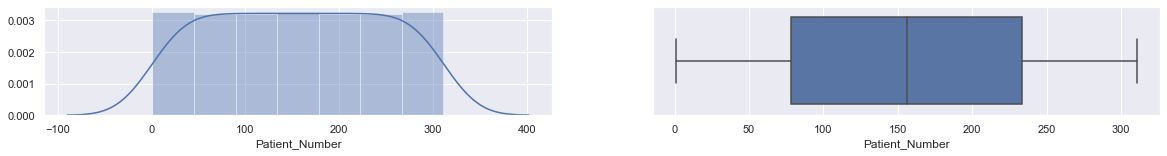

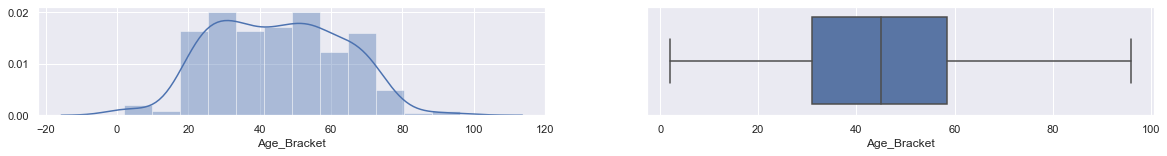

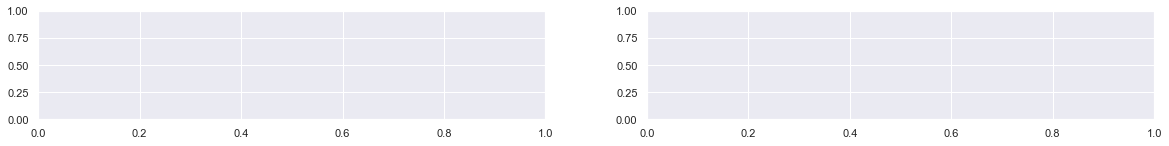

In [59]:
for feature in num_columns:
    feature_data = data_covid[feature]
    univariateAnalysis(feature_data)

In [60]:
# Function to do univariate analysis using countplot and Pie chart
def univariateAnalysis_categorical(feature):
    fig, ax = plt.subplots(1,2, figsize =(20,7))
    g = sns.countplot(feature, ax=ax[0] )
    g.set_xticklabels(list(g.get_xmajorticklabels()),rotation=30)
    feature.value_counts().plot.pie(ax=ax[1], autopct='%.2f %%')

In [61]:
# Getting list of non-numeric columns
non_num_cols = ['Gender','Detected_City','Detected_District', 'Detected_State','Nationality','Type_of_transmission','Weather_Cond']

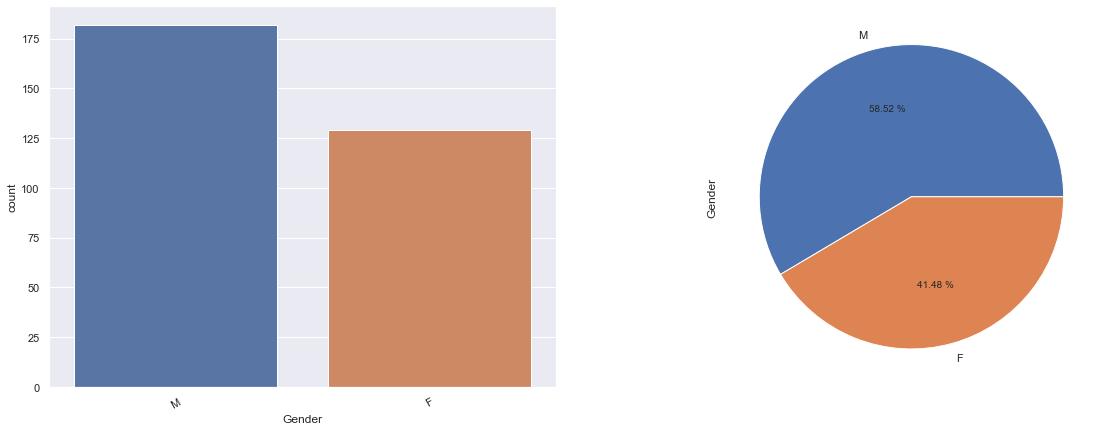

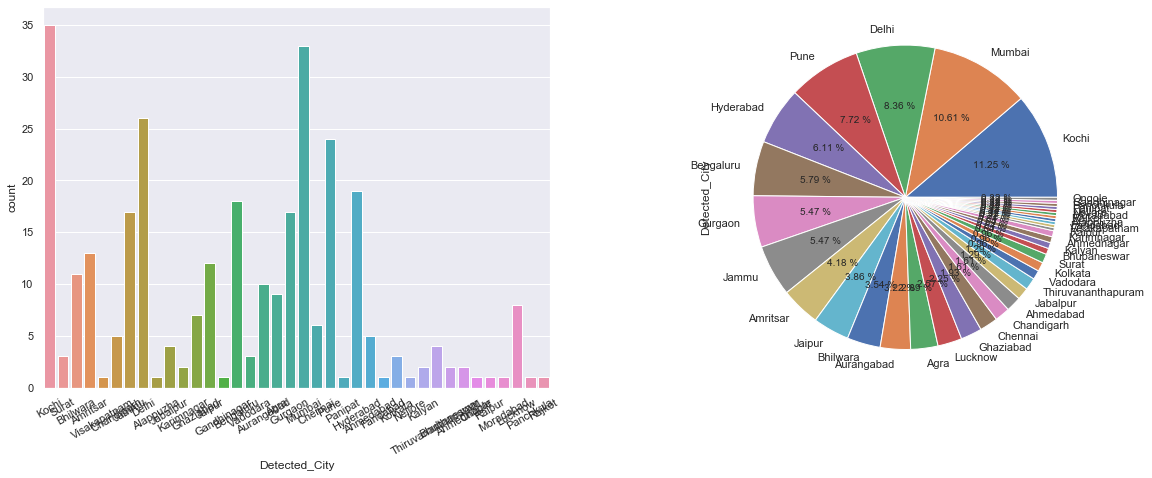

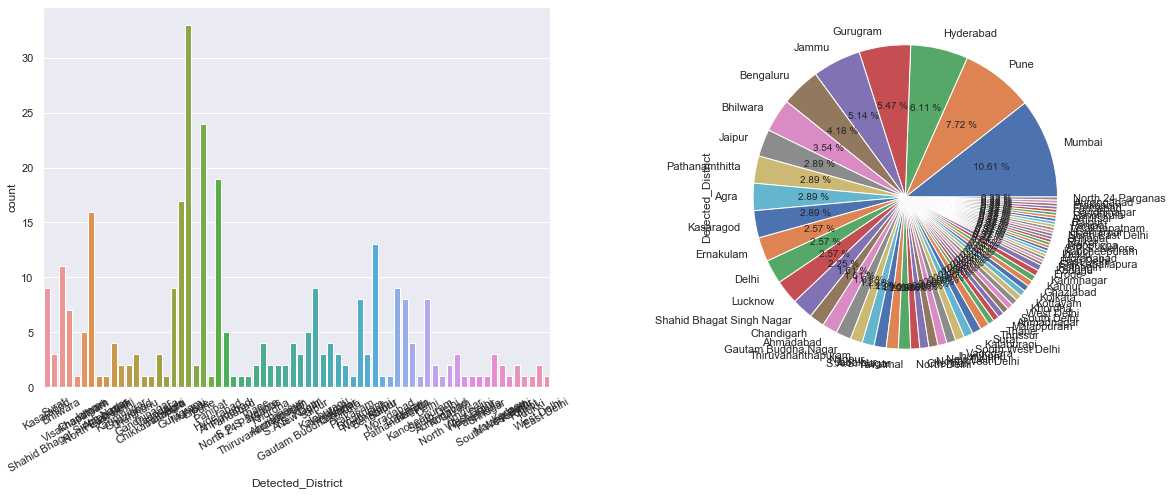

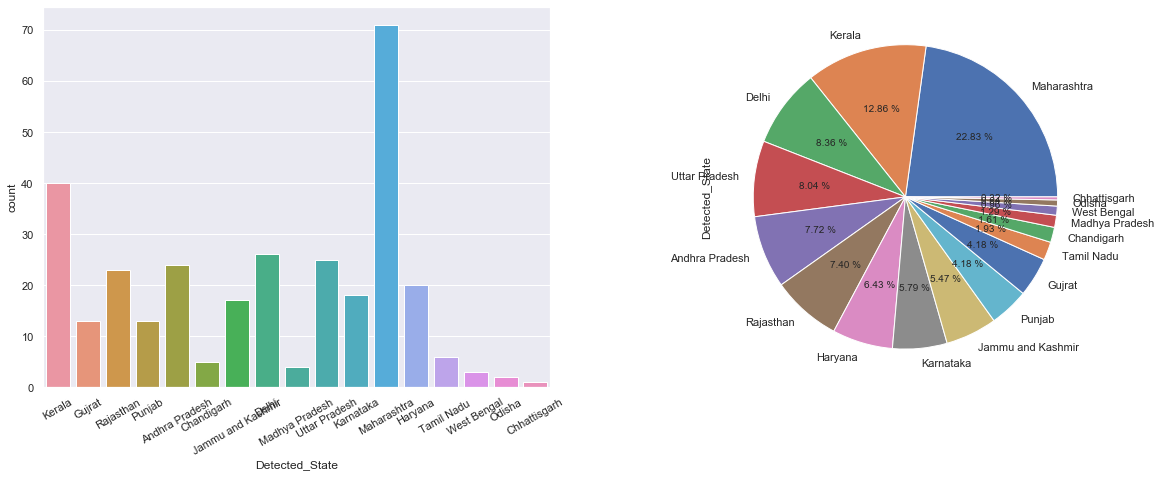

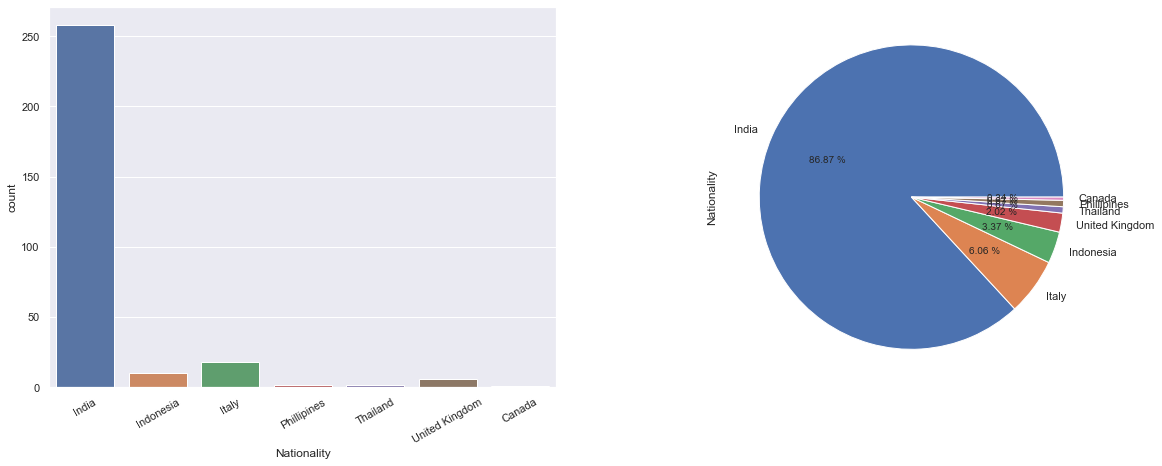

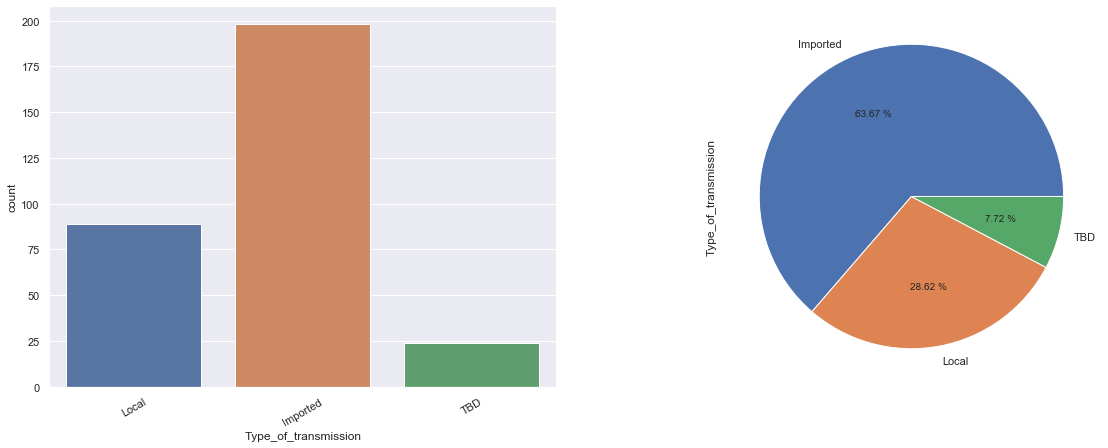

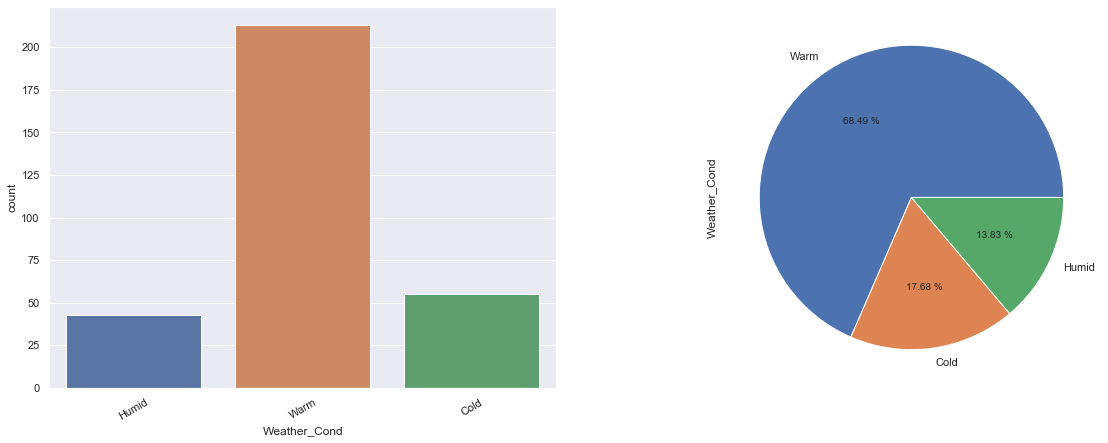

In [62]:
for feature in non_num_cols:
    feature_data = data_covid[feature]
    univariateAnalysis_categorical(feature_data)

## Pairwise Plot

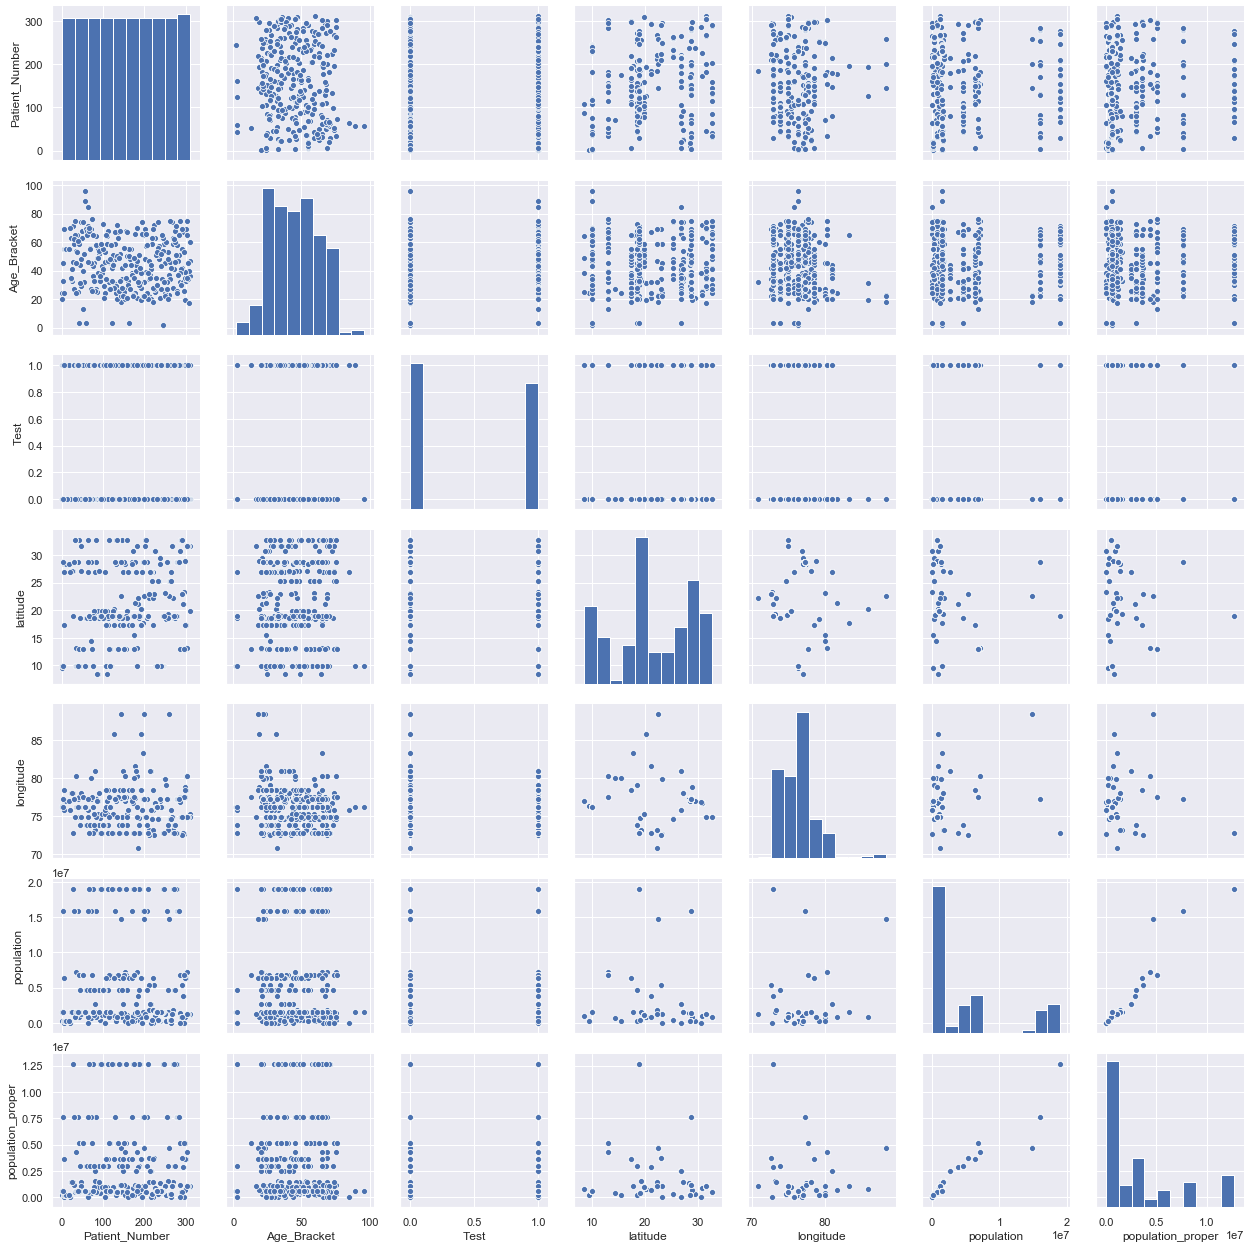

In [63]:
sns.pairplot(data_covid)

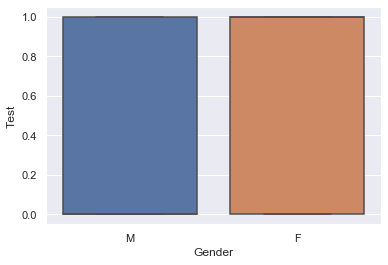

In [67]:
sns.boxplot(x='Gender', y='Test', data=data_covid)

## Kmeans Clustering

In [68]:
# Importing Libraries for splitting the data and metrices
from sklearn.cluster import KMeans

In [70]:
data_covid.columns

Index(['Patient_Number', 'Age_Bracket', 'Gender', 'Detected_City',
       'Detected_District', 'Detected_State', 'Contracted_from_which_Patient_',
       'Nationality', 'Type_of_transmission', 'Status_Change_Date', 'Test',
       'city', 'latitude', 'longitude', 'country', 'iso2', 'state', 'capital',
       'population', 'population_proper', 'Weather_Cond'],
      dtype='object')

In [83]:
X = data_covid[['Age_Bracket','population']]

In [84]:
X=X.to_numpy()

## Get Elbow point for number of cluster

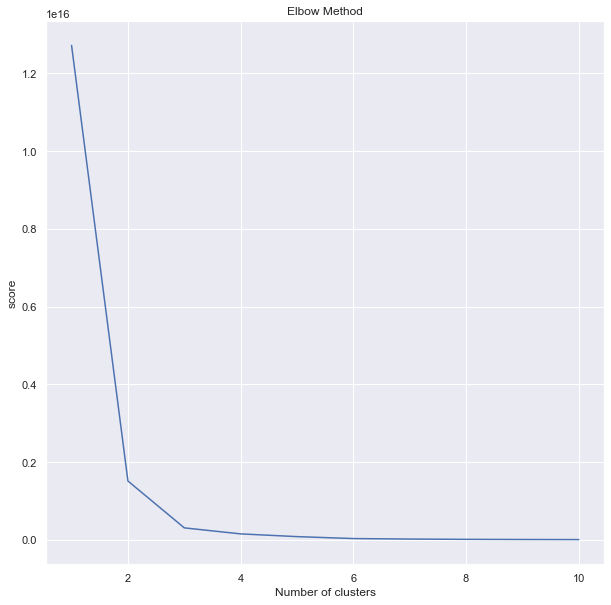

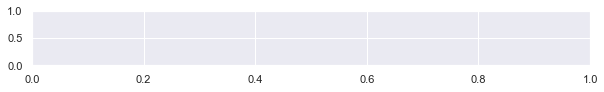

In [85]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
    
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('score')
fig, ax = plt.subplots(figsize =(10,1))
plt.show()

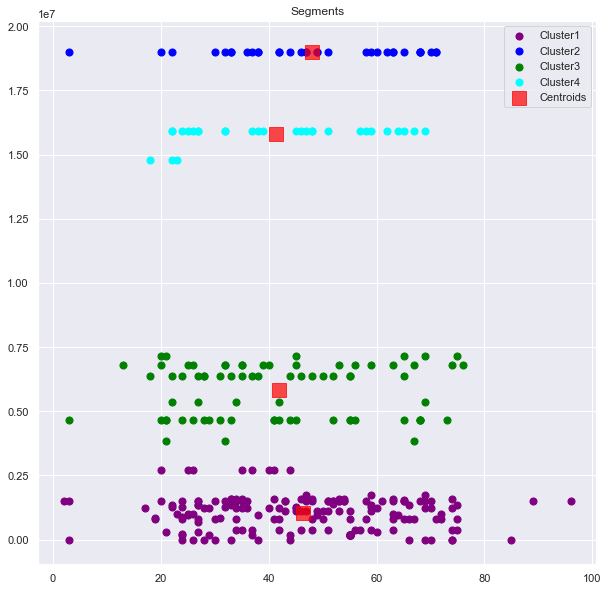

In [87]:
##Fitting kmeans to the dataset - k=4
km=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(X)
#Visualizing the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Segments')
plt.legend()
plt.show()

In [88]:
data_covid['cluster']= km.labels_

In [93]:
cluster_df =data_covid[['cluster','Age_Bracket', 'Gender', 'Detected_City','Detected_State', 'Contracted_from_which_Patient_','Nationality','Type_of_transmission','population', 'Weather_Cond','Test']]

In [94]:
cluster_df.head(10)

,cluster,Age_Bracket,Gender,Detected_City,Detected_State,Contracted_from_which_Patient_,Nationality,Type_of_transmission,population,Weather_Cond,Test
0,0,2,M,Kochi,Kerala,P117,India,Local,1519000,Humid,0
1,2,67,M,Surat,Gujrat,NaN,India,Local,3842000,Warm,0
2,0,37,M,Bhilwara,Rajasthan,NaN,India,Local,389911,Warm,0
3,0,36,F,Amritsar,Punjab,P182,India,Local,1212000,Cold,1
4,0,65,M,Visakapatnam,Andhra Pradesh,NaN,India,Imported,1529000,Warm,0
5,0,72,F,Chandigarh,Chandigarh,P172,India,Local,979000,Cold,0
6,0,48,M,Jammu,Jammu and Kashmir,NaN,India,Local,791000,Cold,0
7,3,38,F,Delhi,Delhi,NaN,India,Imported,15926000,Warm,1
8,0,24,M,Alappuzha,Kerala,NaN,India,Imported,176783,Humid,0
9,0,59,M,Jabalpur,Madhya Pradesh,NaN,India,Imported,1285000,Warm,0


In [95]:
cluster_df.groupby('cluster').mean()

,Age_Bracket,population,Test
cluster,,,
0,46.287356,1.028348e+06,0.442529
1,48.030303,1.897800e+07,0.393939
2,41.920000,5.824227e+06,0.560000
3,41.379310,1.580817e+07,0.413793


In [96]:
cluster_df.to_csv (r"C:\Users\BJ186003\OneDrive - Teradata\Vantage\CaseStudy\Covid\Cluster_Ouput.csv", index = False, header=True)

In [22]:
X = data_covid[['latitude', 'longitude']]

In [23]:
X=X.to_numpy()

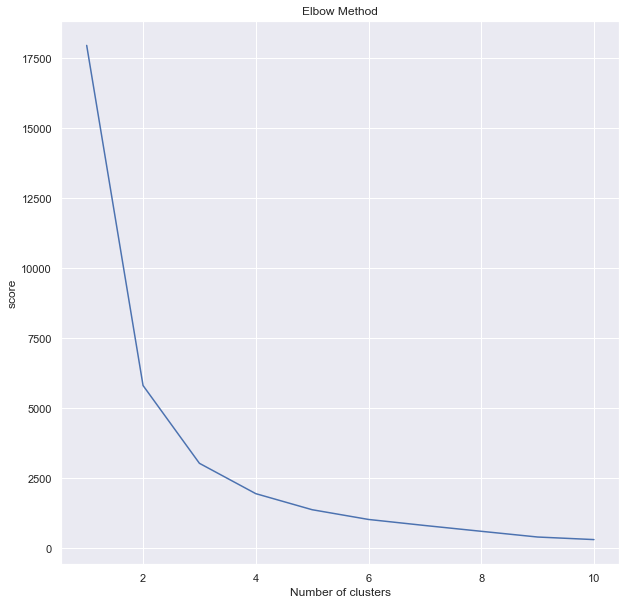

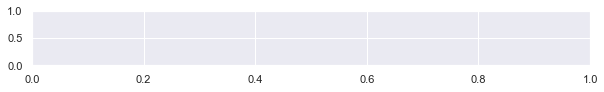

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
    
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('score')
fig, ax = plt.subplots(figsize =(10,1))
plt.show()

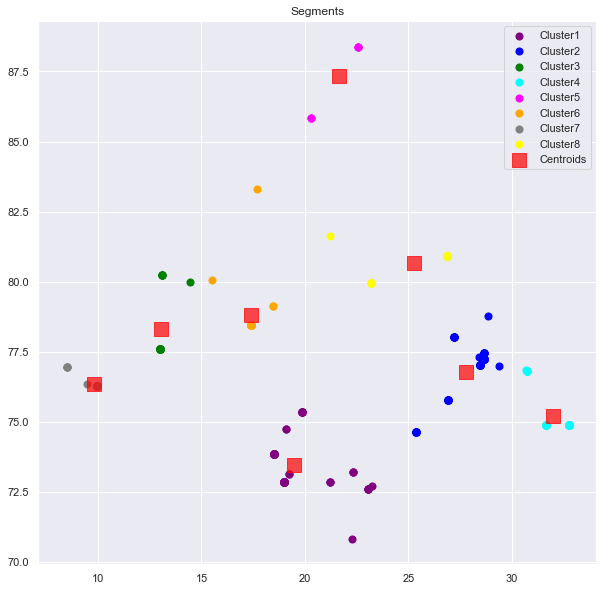

In [25]:
##Fitting kmeans to the dataset - k=4
km=KMeans(n_clusters=8,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(X)
#Visualizing the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')
plt.scatter(X[y_means==6,0],X[y_means==6,1],s=50, c='gray',label='Cluster7')
plt.scatter(X[y_means==7,0],X[y_means==7,1],s=50, c='yellow',label='Cluster8')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Segments')
plt.legend()
plt.show()

In [105]:
data_covid['cluster']= km.labels_

In [106]:
cluster_df =data_covid[['cluster','Patient_Number','Age_Bracket', 'Gender', 'Detected_City','Detected_State', 'Contracted_from_which_Patient_','Nationality','Type_of_transmission','population', 'Weather_Cond','Test']]

In [107]:
cluster_df.to_csv (r"C:\Users\BJ186003\OneDrive - Teradata\Vantage\CaseStudy\Covid\Cluster_Ouput_Lat_Long.csv", index = False, header=True)

In [1]:
#cluster on age,population

In [30]:
X = data_covid[['Age_Bracket', 'population']]

In [31]:
X=X.to_numpy()

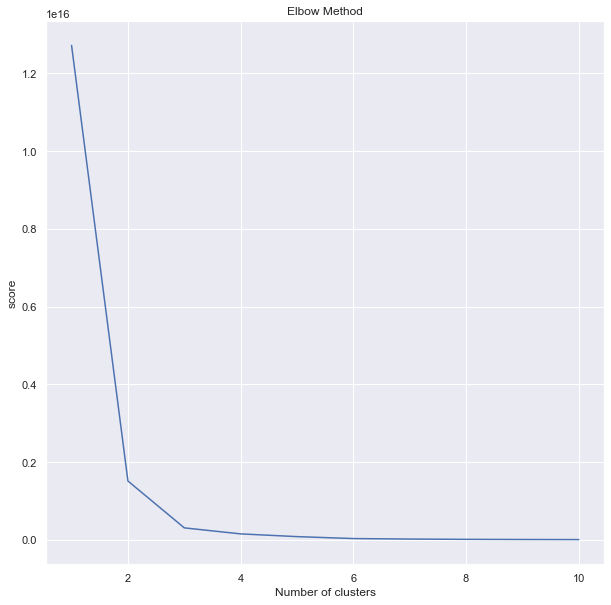

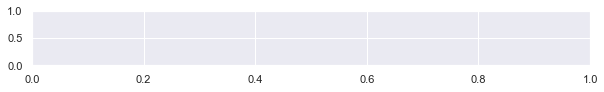

In [32]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
    
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('score')
fig, ax = plt.subplots(figsize =(10,1))
plt.show()

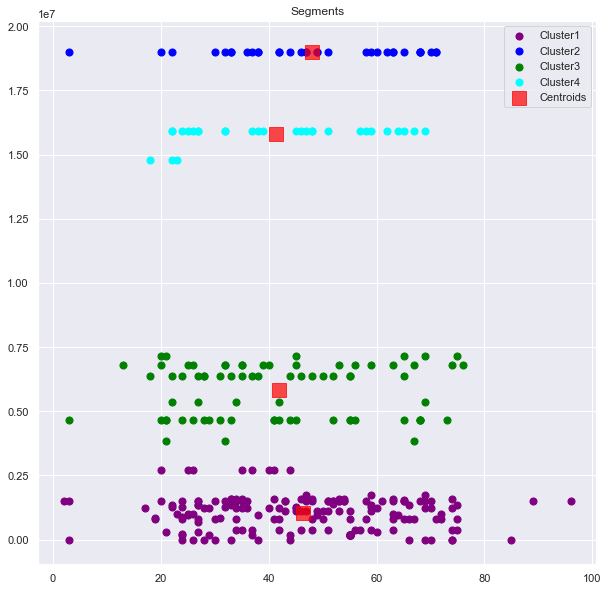

In [34]:
##Fitting kmeans to the dataset - k=4
km=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(X)
#Visualizing the clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Segments')
plt.legend()
plt.show()

In [35]:
data_covid['cluster']= km.labels_

In [36]:
cluster_df =data_covid[['cluster','Patient_Number','Age_Bracket', 'Gender', 'Detected_City','Detected_State', 'Contracted_from_which_Patient_','Nationality','Type_of_transmission','population', 'Weather_Cond','Test']]

In [37]:
cluster_df.to_csv ("CCluster_Ouput_Lat_Long_age_population.csv", index = False, header=True)

## XGBOOST Modeling

In [38]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [39]:
# split data into X and y
X = data_covid[['Age_Bracket','latitude','longitude','population']]
Y = data_covid[['Test']]


In [40]:
# split data into train and test sets
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [41]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.56%


In [42]:
model.feature_importances_

array([0.23267193, 0.25582775, 0.19903365, 0.3124666 ], dtype=float32)